<a href="https://colab.research.google.com/github/ajmal92/datascience/blob/main/Aerofit_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv("https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/001/125/original/aerofit_treadmill.csv?1639992749")
import seaborn as sns
import matplotlib.pyplot as plt

# EDA

In [ ]:
df.isna().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [ ]:
df.shape

(180, 9)

In [ ]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [ ]:
df.columns

Index(['Product', 'Age', 'Gender', 'Education', 'MaritalStatus', 'Usage',
       'Fitness', 'Income', 'Miles'],
      dtype='object')

In [ ]:
df['Age'].max(), df['Age'].min()

(50, 18)

In [ ]:
df['Income'].max(), df['Income'].min()

(104581, 29562)

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Single vs Partnered Customers')

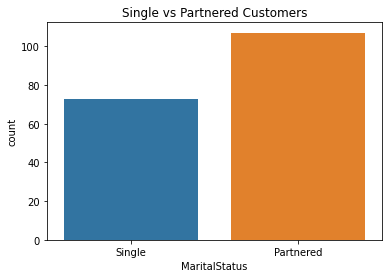

In [ ]:
sns.countplot(df['MaritalStatus'])
plt.title("Single vs Partnered Customers")


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Education Frequency')

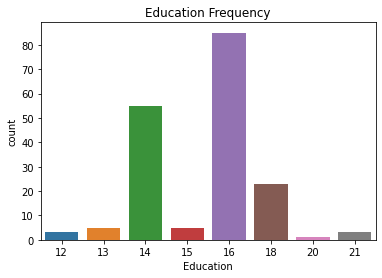

In [ ]:
sns.countplot(df['Education'])
plt.title("Education Frequency")

<AxesSubplot:xlabel='Income', ylabel='Count'>

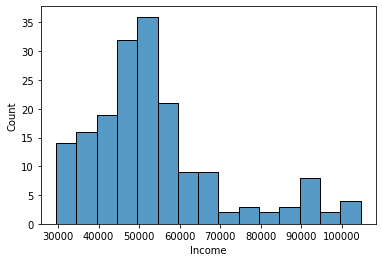

In [ ]:
sns.histplot(df['Income'],)




*   Majority of the customers are having income between 50000 and 60000
*   Customers having income beyond 70000 are low in number





(-1.099998469919639,
 1.099991049780501,
 -1.0999999744291418,
 1.0999999987823401)

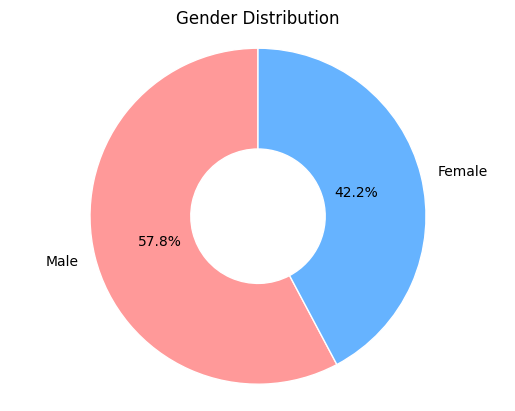

In [ ]:
colors = ['#ff9999','#66b3ff']
wedgeprops = {'width': 0.6, 'edgecolor': 'white'}
plt.pie([t['Male'],t['Female']], labels=['Male', 'Female'], autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops=wedgeprops)
plt.title('Gender Distribution')
plt.axis('equal')

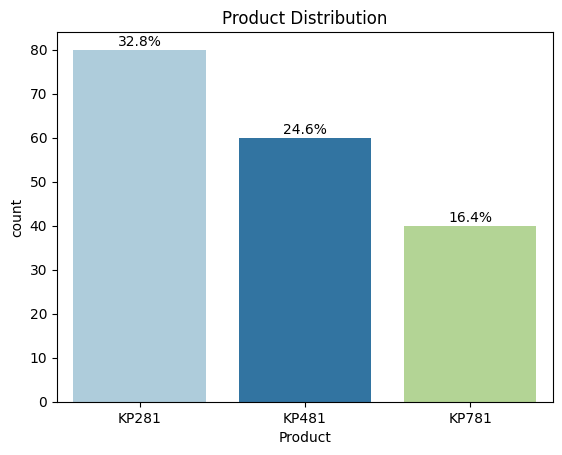

In [ ]:
ax = sns.countplot(data=df, x='Product', palette='Paired')
plt.title('Product Distribution')
for p in ax.patches:
    count = p.get_height()
#     print(cou)
    percentage = '{:.1f}%'.format(100 * count / len(tips))
    ax.text(p.get_x() + p.get_width() / 2, count + 1 , f'{percentage}', ha="center")


- KP281 is the largest selling product with a share of 32.8%

Text(0.5, 1.0, 'Correlation Heatmap')

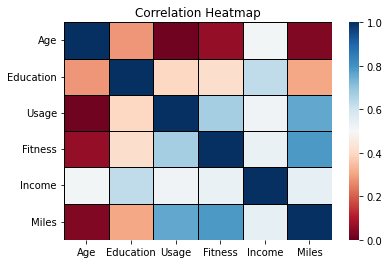

In [ ]:
sns.heatmap(df.corr(), cmap='RdBu', linewidths=1, linecolor='black', vmin=0, vmax=1)
plt.title('Correlation Heatmap')

- Usage and Fitness are directly proportional to Miles
- Age is strongly inversely proportional to Miles,Usaget and Fitness. Younger Age group have high self-fitness rating and they plan to cover more miles per week.


# Cateogorizing numerical fields

In [ ]:
def get_bounds(category):
    q1 = df.quantile(0.25, numeric_only=True)
    q3 = df.quantile(0.75, numeric_only=True)
    median = df.median(numeric_only=True)
    iqr = q3[category] - q1[category]
    lower_bound = q1[category] - (1.5*iqr)
    upper_bound = q3[category] + (1.5*iqr)
    return q1[category], q3[category], lower_bound, upper_bound

def categorize(category, with_outliers=False):
    q1_cat, q3_cat, lower_bound, upper_bound = get_bounds(category)
    if with_outliers:
        return [df[category].min(), q1_cat, q3_cat, df[category].max()]
    else:
        return [max(lower_bound,df[category].min()) , q1_cat, q3_cat, min(upper_bound, df[category].max())]

df['C_Income'] = pd.cut(df['Income'], bins=categorize('Income', with_outliers=True), labels=['Low', 'Medium', 'High'], retbins=False, include_lowest=True)
df['C_Education'] = pd.cut(df['Education'], bins=categorize('Education', with_outliers=True), labels=['Low', 'Medium', 'High'], retbins=False, include_lowest=True)
df['C_Miles'] = pd.cut(df['Miles'], bins=categorize('Miles', with_outliers=True), labels=['Low', 'Medium', 'High'], retbins=False, include_lowest=True)
df['C_Usage'] = pd.cut(df['Usage'], bins=categorize('Usage', with_outliers=True), labels=['Low', 'Medium', 'High'], retbins=False, include_lowest=True)
df['C_Age'] = pd.cut(df['Age'], bins=categorize('Age', with_outliers=True), labels=['18-24', '24-33', '33-50'], retbins=False, include_lowest=True)

### Outlier Detection

In [ ]:
x,y, lower_bound, upper_bound = get_bounds('Income')
# Outliers in Income
outlier_income = df.loc[df['Income']>upper_bound]['Income'].values


x,y, lower_bound, upper_bound = get_bounds('Education')
# Outliers in Education
outlier_edu= df.loc[df['Education']>upper_bound]['Education'].values


x,y, lower_bound, upper_bound = get_bounds('Education')
# Outliers in Usage
outlier_usage = df.loc[df['Usage']>upper_bound]['Usage'].values

print(outlier_income)

print(outlier_edu)

print(outlier_usage)

[ 83416  88396  90886  92131  88396  85906  90886 103336  99601  89641
  95866  92131  92131 104581  83416  89641  90886 104581  95508]
[20 21 21 21]
[]


/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Outliers in Income')

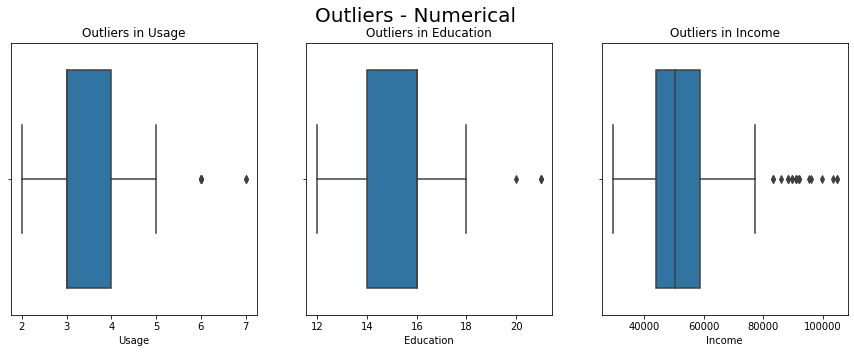

In [ ]:
plt.figure(figsize=(15,5)).suptitle("Outliers - Numerical",fontsize=20)
plt.subplot(1, 3, 1)


sns.boxplot(df['Usage'])
plt.title('Outliers in Usage')
plt.subplot(1, 3, 2)
sns.boxplot(df['Education'])
plt.title('Outliers in Education')
plt.subplot(1, 3, 3)
sns.boxplot(df['Income'])
plt.title('Outliers in Income')

# Insights & Recommendations

<Axes: xlabel='Product', ylabel='Gender-MaritalStatus-C_Income'>

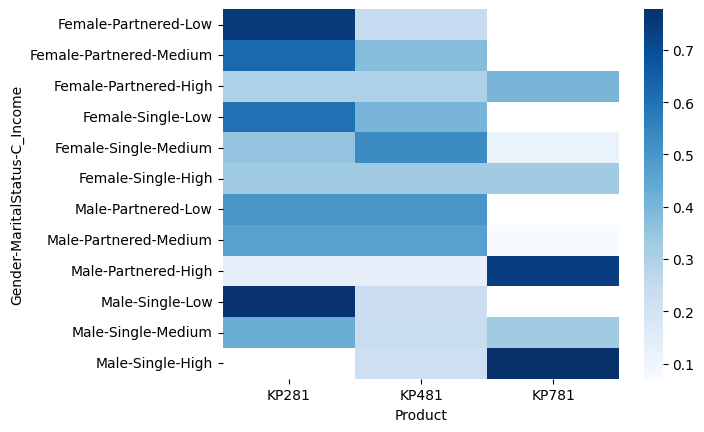

In [ ]:
t = df.groupby(by=['Gender', 'MaritalStatus', 'C_Income'])['Product'].value_counts(normalize=True).unstack()
sns.heatmap(t, cmap='Blues')

- Male who is single/partnered and has high income has higher chances of buying KP781. KP281 product should not be recommended to these audience.
- Male/Female with low income prefer the KP281 followed by KP481. KP781 should not be recommended to this audience

<Axes: title={'center': 'Education-Self Fitness vs Product'}, xlabel='Product', ylabel='C_Education-Fitness'>

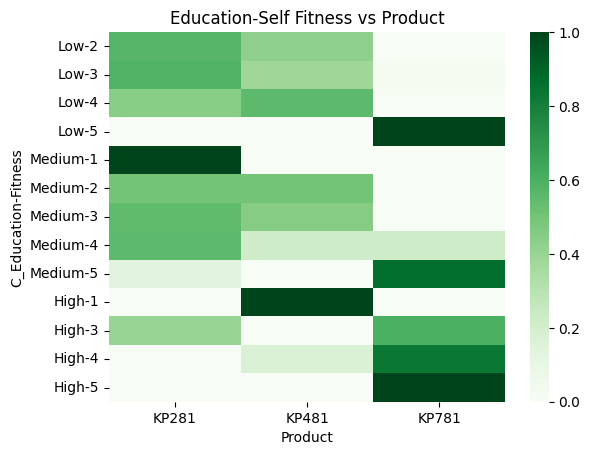

In [ ]:
f_size = 10
color_palette='Greens'
t_edu = df.groupby(by=['C_Education','Fitness'])['Product'].value_counts(normalize=True).unstack().fillna(0)
plt.title('Education-Self Fitness vs Product')
plt.ylabel('', fontsize=f_size)
plt.yticks( fontsize=f_size)
plt.xticks( fontsize=f_size)
sns.heatmap(t_edu, cmap=color_palette, vmax=1, cbar=True, square=False)


- KP481
    - is not preferred by
        - High education customers with self-fitness ratings (3-5)
        - Medium Education Customers with self-fitness rating 5
        - Customers with self-fitness rating of 5
        
    - is preferred by:
        - High Education Customers with self-fitness rating 1

- KP281
    - is not preferred by
        - Customers with self-rating of 5
        - High Education Customers with self-fitness rating (1,4,5)
        
    - is preferred by:
        - Medium Education Customers with self-fitness rating 1

- KP781
    - is not preferred by
        - Low Education Customers with self-fitness ratings (1-4)
        - Medium Education Customers with self-fitness ratings (1-3)
        - High Education Customer with self-fitness rating 1
        
    - is preferred by:
        - Customers with self-fitness rating of 5
        - High Education Customers with self-ratings 4

<Axes: title={'center': 'Usage-Gender-MaritalStatus vs Product'}, xlabel='Product', ylabel='C_Usage-Gender-MaritalStatus'>

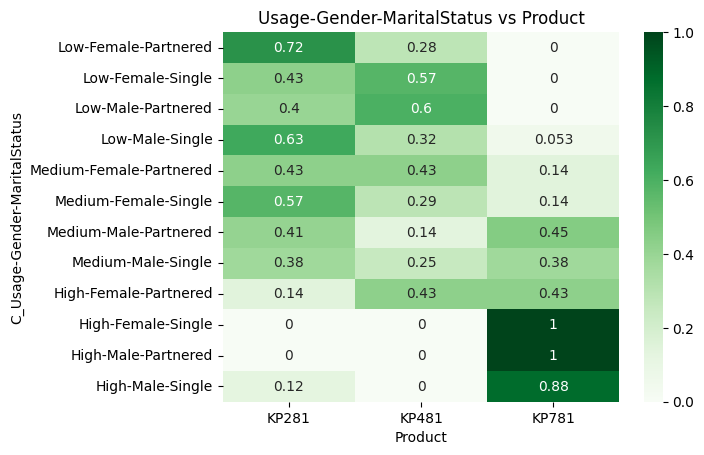

In [ ]:
f_size = 10
t_edu = df.groupby(by=['C_Usage','Gender','MaritalStatus'])['Product'].value_counts(normalize=True).unstack().fillna(0)
plt.title('Usage-Gender-MaritalStatus vs Product')
plt.ylabel('', fontsize=f_size)
plt.yticks( fontsize=f_size)
plt.xticks( fontsize=f_size)
sns.heatmap(t_edu, cmap=color_palette, vmax=1, cbar=True, square=False, annot=True)




- KP781
    - is not preferred by:
        - Low Usage Category
    - is preferred by:
        - High Usage Category

- KP281
    - is not preferred by:
        - High Usage Category
    - is preferred by:
        - Low Usage Females who are partnered

- KP481
    - is not preferred by:
        - High Usage Category
    - is preferred by:
        - Low Usage Females who are partnered
        

In [ ]:
color_palette='Greens'

<AxesSubplot:title={'center':'Income-Miles vs Product'}, xlabel='Product', ylabel='C_Income-C_Miles'>

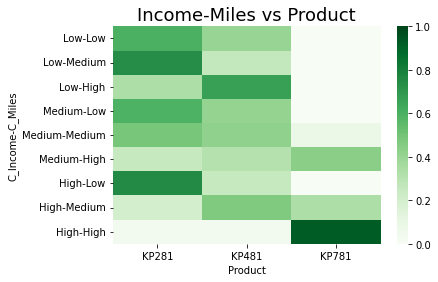

In [ ]:
t1 = df.groupby(by=['C_Income','C_Miles'])['Product'].value_counts(normalize=True).unstack().fillna(0)

plt.title('Income-Miles vs Product', fontsize=18)

sns.heatmap(t1, cmap=color_palette,vmax=1, cbar=True)




- **KP781**
    - Avoid suggesting to
        - Low Income Customers
        - Medium Income Customers with low and medium Education
    - Should suggest to
        - High Education category of customers  with self-fitness ratings(3-5)
        - High Usage Customers
        - Customers with 5 self-fitness ratings

- **KP481**
    - Avoid suggesting to
        - Low Income people with Medium Education
        
    - Should suggest
        - Low Income with high education
        - High Education Customers with 1 self-fitness rating.
- **KP281**
    - Avoid suggesting to
    
    - Should suggest
        - Low income customers with Low Education
      

Text(0.5, 1.0, 'Medium Income Category')

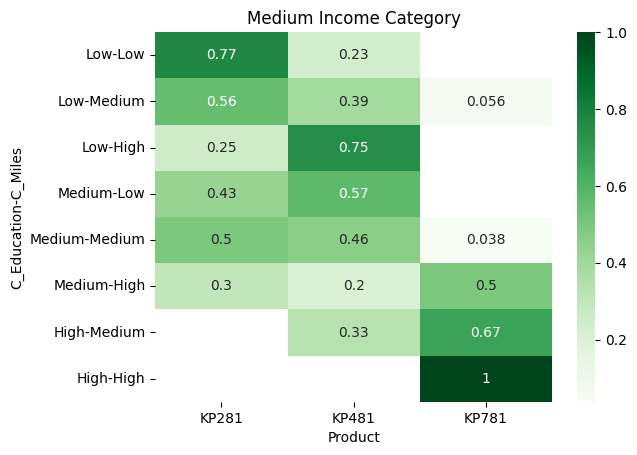

In [ ]:
df_medium_income = df.loc[df['C_Income']=='Medium']
t4 = df_medium_income.groupby(by=['C_Education','C_Miles'])['Product'].value_counts(normalize=True).unstack()
sns.heatmap(t4, cmap=color_palette, vmax=1, annot=True)
plt.title('Medium Income Category')
# sns.barplot(df_medium_income, x='Product', hue='C_Education')


For customers belonging to **medium income**,
 - **KP481**
     - is not recommeded for:
         - given that he/she belongs to medium education and high miles category, KP481 is not preferred
     - preferred for:
         - given that he/she belongs to high education and medium miles category, KP481 is **strongly** recommended
         - given that he/she belongs to low education and high miles category, KP481 should be recommended
 
  - **KP281**
     - is not recommeded for:
         - given that he/she belongs to high education and medium miles category, KP281 should not be recommended
         - given that he/she belongs to low education and high miles category, KP281 should not be recommended
     - preferred for:
         - given that he/she belongs to low education and low miles category, KP281 is preferred.
   

Text(0.5, 1.0, 'Low Income Category')

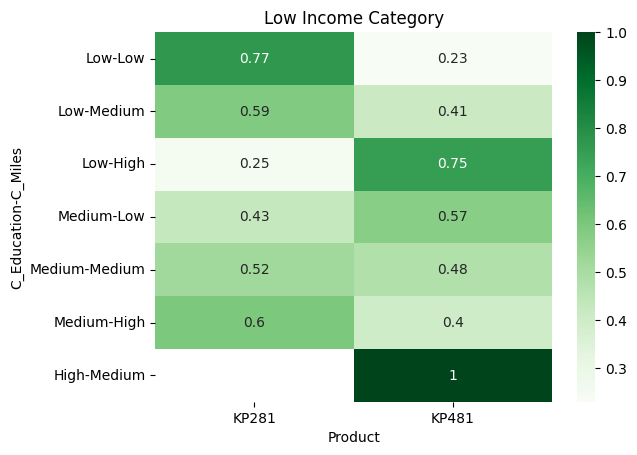

In [ ]:
df_lowincome = df.loc[(df['C_Income']=='Low') & (df['Product'].isin(['KP281','KP481','KP781']))]
t5 = df_medium_income.groupby(by=['C_Education','C_Miles'])['Product'].value_counts(normalize=True).unstack()
sns.heatmap(t5, cmap=color_palette, annot=True)
plt.title('Low Income Category')

For customers belonging to **low income**,
 - **KP481**
     - is not recommeded for:
         - given that he/she belongs to low education and low miles category, KP481 is not preferred
     - preferred for:
         - given that he/she belongs to high education and medium miles category, KP481 is **strongly** recommended
         - given that he/she belongs to low education and high miles category, KP481 should be recommended
 
  - **KP281**
     - is not recommeded for:
         - given that he/she belongs to high education and medium miles category, KP281 should not be recommended
         - given that he/she belongs to low education and high miles category, KP281 should not be recommended
     - preferred for:
         - given that he/she belongs to low education and low miles category, KP281 is preferred.
   

# Customer Categorization


*   KP281
  - Low Income, Low Education
  - Medium Income ,low education and low miles category
  - Low Usage Females who are partnered
  - Medium Education Customers with self-fitness rating 1
*   KP481
  - High Education Customers with self-fitness rating 1
  - Low Income ,high education and medium miles category.
  - Low income , low education and high miles category
  - Medium income, high education and medium miles category, 
  - Medium Income, low education and high miles category
  - Low Usage Males who are partnered

*   KP781
  - High Education category of customers with self-fitness ratings(3-5)
  - High Usage Customers
  - Customers with 5 self-fitness ratings
  - Customers with self-fitness rating of 5
  - High Education Customers with self-ratings 4





